In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


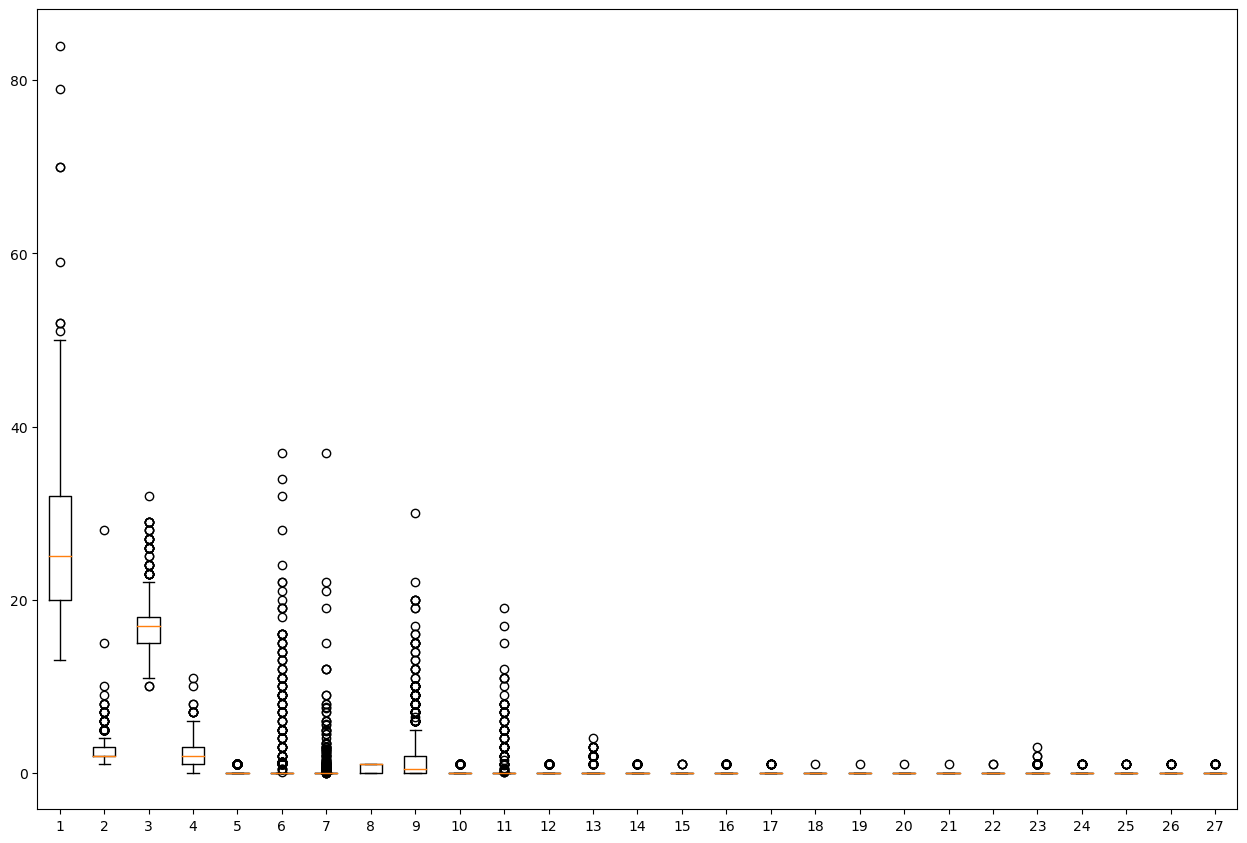

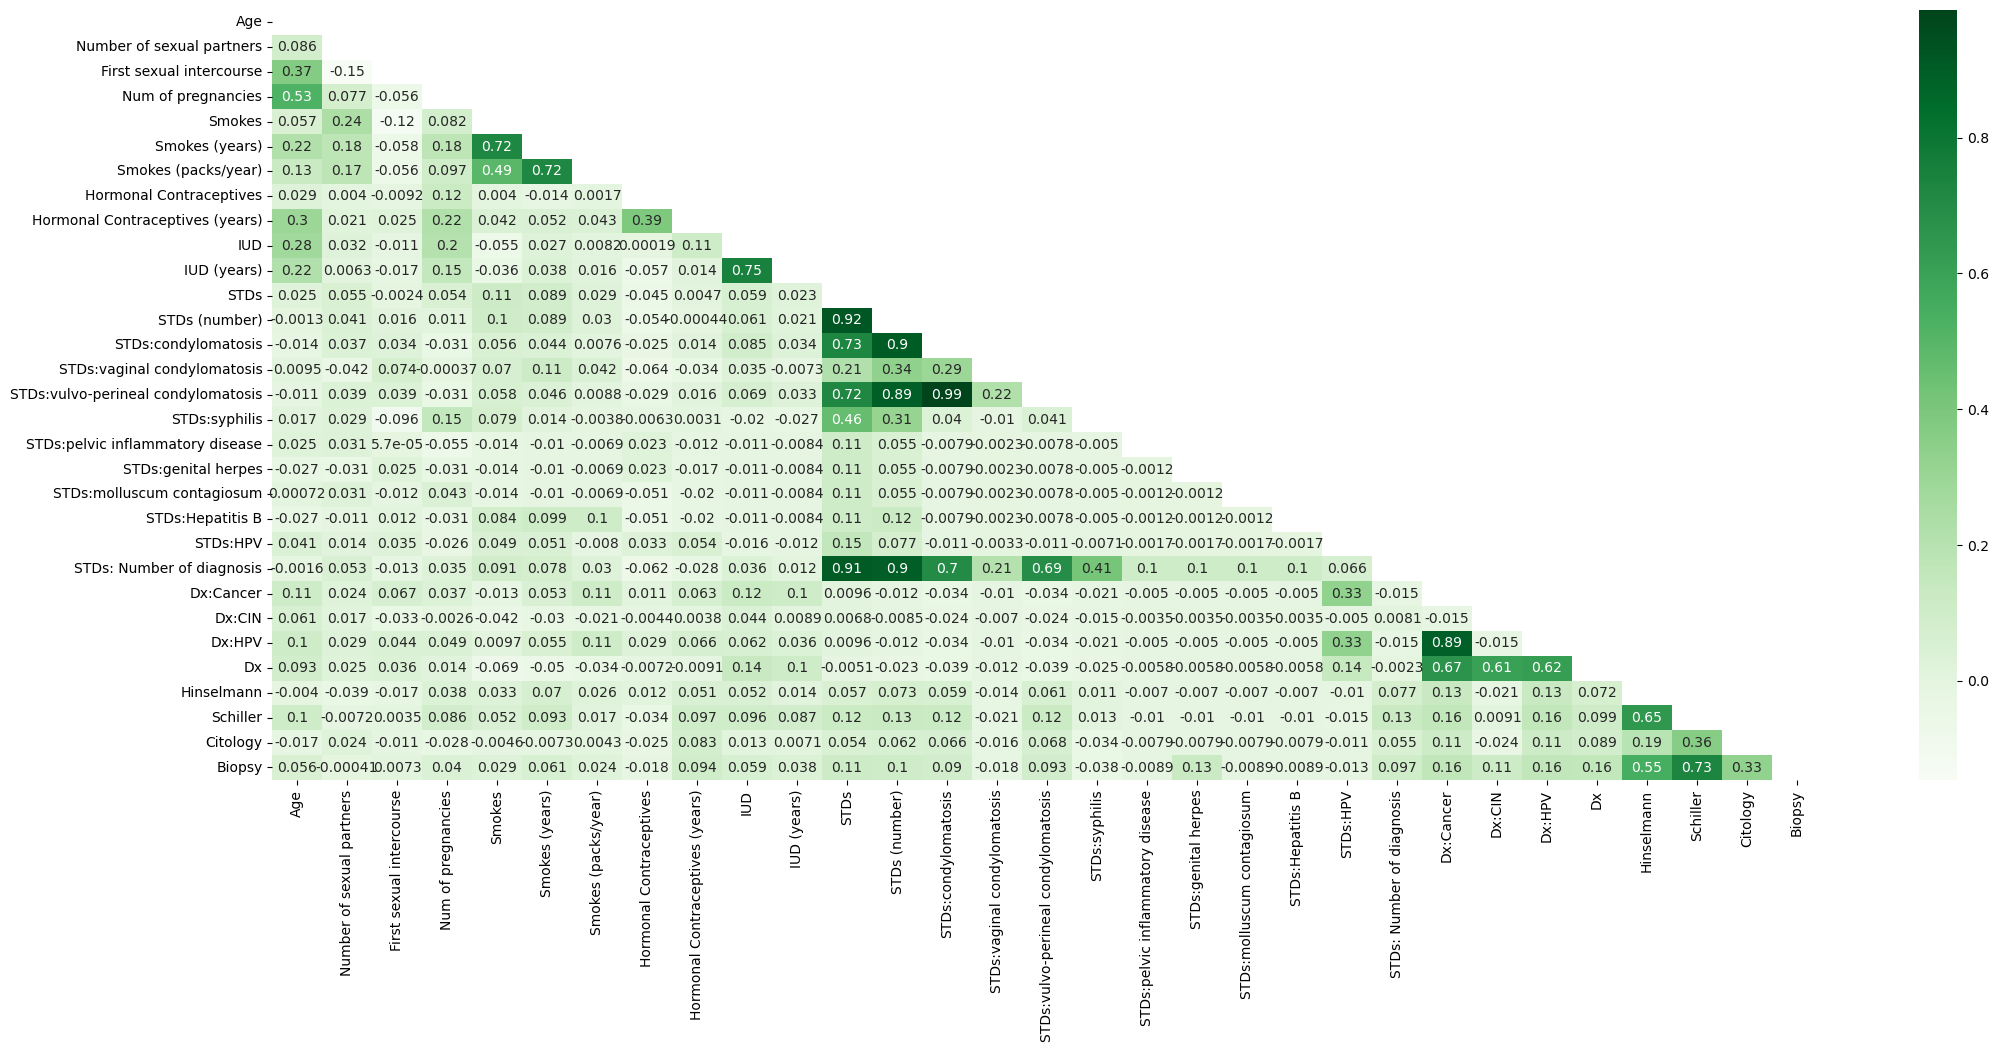

SVM for Hinselmann:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       171
           1       0.96      0.92      0.94       159

    accuracy                           0.95       330
   macro avg       0.95      0.94      0.95       330
weighted avg       0.95      0.95      0.95       330

SVM Classifier Accuracy: 0.9454545454545454


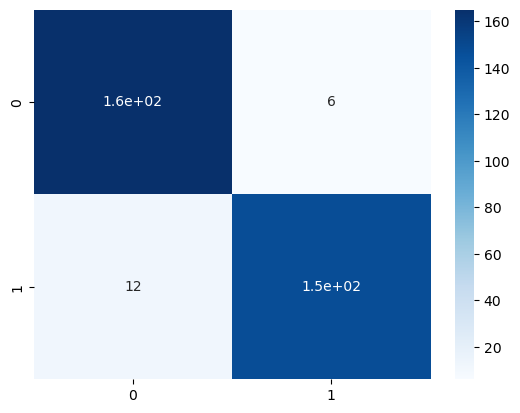

SVM for Biopsy:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       179
           1       0.94      0.92      0.93       143

    accuracy                           0.94       322
   macro avg       0.94      0.94      0.94       322
weighted avg       0.94      0.94      0.94       322

SVM Classifier Accuracy: 0.9409937888198758


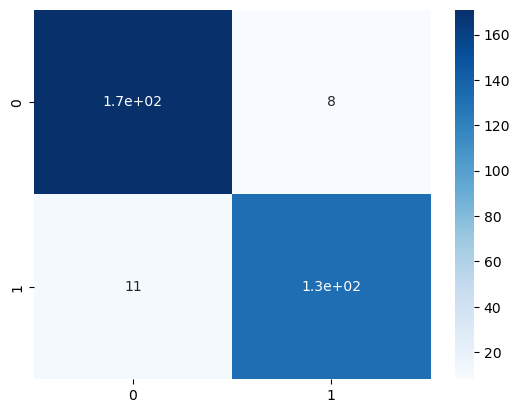

SVM for Schiller:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       156
           1       0.92      0.88      0.90       158

    accuracy                           0.90       314
   macro avg       0.90      0.90      0.90       314
weighted avg       0.90      0.90      0.90       314

SVM Classifier Accuracy: 0.9012738853503185


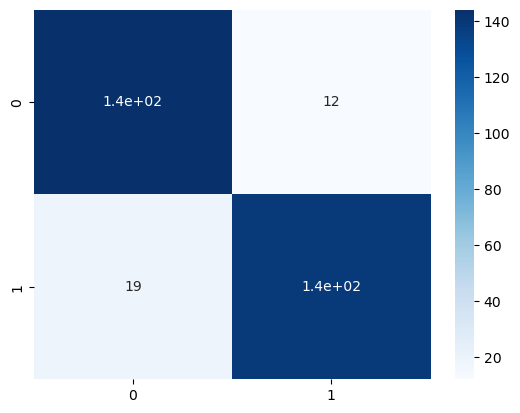

SVM for Citology:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       167
           1       0.91      0.92      0.92       159

    accuracy                           0.92       326
   macro avg       0.92      0.92      0.92       326
weighted avg       0.92      0.92      0.92       326

SVM Classifier Accuracy: 0.9171779141104295


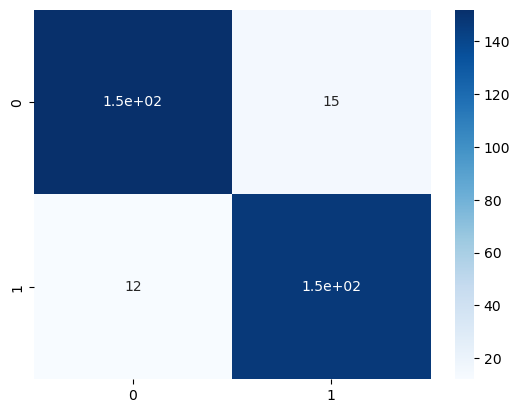

KNN for Hinselmann:
               precision    recall  f1-score   support

           0       0.98      0.89      0.94       171
           1       0.90      0.98      0.94       159

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

KNN Classifier Accuracy: 0.9363636363636364


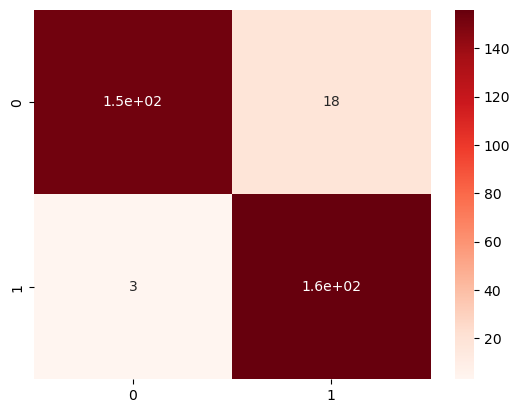

KNN for Biopsy:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       179
           1       0.88      0.97      0.92       143

    accuracy                           0.93       322
   macro avg       0.93      0.93      0.93       322
weighted avg       0.93      0.93      0.93       322

KNN Classifier Accuracy: 0.9285714285714286


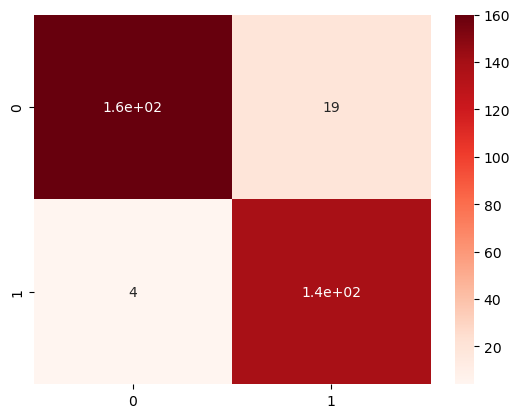

KNN for Schiller:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       156
           1       0.90      0.96      0.93       158

    accuracy                           0.93       314
   macro avg       0.93      0.93      0.93       314
weighted avg       0.93      0.93      0.93       314

KNN Classifier Accuracy: 0.9267515923566879


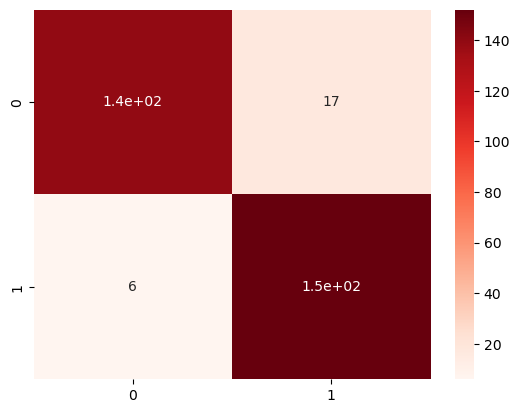

KNN for Citology:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       167
           1       0.89      0.95      0.92       159

    accuracy                           0.92       326
   macro avg       0.92      0.92      0.92       326
weighted avg       0.92      0.92      0.92       326

KNN Classifier Accuracy: 0.9202453987730062


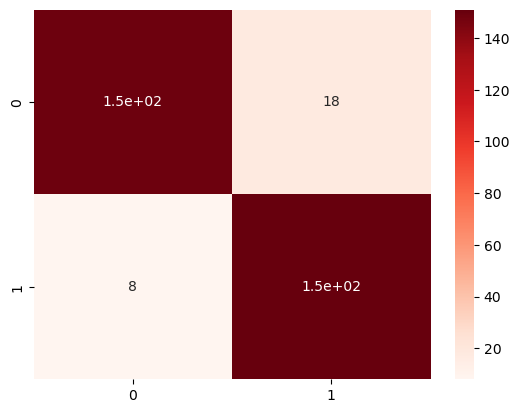

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.decomposition import PCA

df = pd.read_csv("/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df = df.replace('?', pd.np.nan)

df = df.apply(pd.to_numeric, errors = "coerce")
df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)

df = df.fillna(df.median())
median = df.median()
df_c = df.copy()
pd.set_option('mode.chained_assignment', None)
for col in df_c.columns:
    percentiles = df_c[col].quantile([0.25, 0.75]).values
    df_c[col][df_c[col] <= percentiles[0]] = percentiles[0]
    df_c[col][df_c[col] >= percentiles[1]] = percentiles[1]
    

df_c = (df-df.min())/(df.max()-df.min())
df = df.drop(['STDs:cervical condylomatosis','STDs:HIV','STDs:AIDS'],axis=1)

df_bp = df.drop(["Hinselmann","Biopsy","Schiller","Citology"], axis=1)
fig = plt.figure(figsize =(12, 8))

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df_bp)
plt.show()



#correlation heatmap
correlation = df.corr()
f, ax = plt.subplots(figsize=(25,10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask,cmap='Greens')
plt.show()

pca_df = PCA(n_components =12)

X_pca = pca_df.fit_transform(df.drop(["Hinselmann","Biopsy","Schiller","Citology"],axis=1))
y_H = df["Hinselmann"]
y_B = df["Biopsy"]
y_S =df["Schiller"]
y_C =df["Citology"]

smote =SMOTE(random_state=42)
X_H, y_H= smote.fit_resample(X_pca, y_H)
X_H_train,X_H_test,y_H_train,y_H_test = train_test_split(X_H,y_H,test_size=0.2,random_state=42)

X_B, y_B= smote.fit_resample(X_pca, y_B)
X_B_train,X_B_test,y_B_train,y_B_test = train_test_split(X_B,y_B,test_size=0.2,random_state=42)

X_S, y_S= smote.fit_resample(X_pca, y_S)
X_S_train,X_S_test,y_S_train,y_S_test = train_test_split(X_S,y_S,test_size=0.2,random_state=42)

X_C, y_C= smote.fit_resample(X_pca, y_C)
X_C_train,X_C_test,y_C_train,y_C_test = train_test_split(X_C,y_C,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_H_train = scaler.fit_transform(X_H_train)
X_H_test = scaler.fit_transform(X_H_test)

X_B_train = scaler.fit_transform(X_B_train)
X_B_test = scaler.fit_transform(X_B_test)

X_C_train = scaler.fit_transform(X_C_train)
X_C_test = scaler.fit_transform(X_C_test)

X_S_train = scaler.fit_transform(X_S_train)
X_S_test = scaler.fit_transform(X_S_test)



svm = SVC(kernel="rbf")
svm_params = {"C": [0.1,0.8,10], "gamma": [0.1,0.8,10]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_H_train, y_H_train)
y_Hs_pred = svm_grid.predict(X_H_test)
print("SVM for Hinselmann:\n", classification_report(y_H_test, y_Hs_pred))
svm_acc_H = accuracy_score(y_H_test, y_Hs_pred)
print("SVM Classifier Accuracy:", svm_acc_H)

svm_CM_H = confusion_matrix(y_H_test,y_Hs_pred )
sns.heatmap(svm_CM_H, annot=True, cmap="Blues")
plt.show()

svm = SVC(kernel="rbf")
svm_params = {"C": [0.1,1,10], "gamma": [0.1,1,10]}
svm_grid2 = GridSearchCV(svm, svm_params, cv=5)
svm_grid2.fit(X_B_train, y_B_train)
y_Bs_pred = svm_grid2.predict(X_B_test)
print("SVM for Biopsy:\n", classification_report(y_B_test, y_Bs_pred))
svm_acc_B = accuracy_score(y_B_test, y_Bs_pred)
print("SVM Classifier Accuracy:", svm_acc_B)

svm_CM_B = confusion_matrix(y_B_test,y_Bs_pred )
sns.heatmap(svm_CM_B, annot=True, cmap="Blues")
plt.show()

svm = SVC(kernel="rbf")
svm_params = {"C": [0.1,1,10], "gamma": [0.1,1,10]}
svm_grid3 = GridSearchCV(svm, svm_params, cv=5)
svm_grid3.fit(X_S_train, y_S_train)
y_Ss_pred = svm_grid3.predict(X_S_test)
print("SVM for Schiller:\n", classification_report(y_S_test, y_Ss_pred))
svm_acc_S = accuracy_score(y_S_test, y_Ss_pred)
print("SVM Classifier Accuracy:", svm_acc_S)

svm_CM_S = confusion_matrix(y_S_test,y_Ss_pred )
sns.heatmap(svm_CM_S, annot=True, cmap="Blues")
plt.show()

svm = SVC(kernel="rbf")
svm_params = {"C": [0.2,0.8,10], "gamma": [0.2,0.8,10]}
svm_grid4 = GridSearchCV(svm, svm_params, cv=5)
svm_grid4.fit(X_C_train, y_C_train)
y_Cs_pred = svm_grid4.predict(X_C_test)
print("SVM for Citology:\n", classification_report(y_C_test, y_Cs_pred))
svm_acc_C = accuracy_score(y_C_test, y_Cs_pred)
print("SVM Classifier Accuracy:", svm_acc_C)

svm_CM_C = confusion_matrix(y_C_test,y_Cs_pred )
sns.heatmap(svm_CM_C, annot=True, cmap="Blues")
plt.show()

#for KNN
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": [1,2,5,11]}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_H_train, y_H_train)
y_Hk_pred = knn_grid.predict(X_H_test)
print("KNN for Hinselmann:\n", classification_report(y_H_test,y_Hk_pred))
knn_acc_H = accuracy_score(y_H_test, y_Hk_pred)
print("KNN Classifier Accuracy:", knn_acc_H)
knn_CM_H = confusion_matrix(y_H_test,y_Hk_pred)

sns.heatmap(knn_CM_H, annot=True, cmap="Reds")
plt.show()

knn_params2 = {"n_neighbors": [1,5,8,10]}
knn_grid2 = GridSearchCV(knn, knn_params2, cv=5)
knn_grid2.fit(X_B_train, y_B_train)
y_Bk_pred = knn_grid2.predict(X_B_test)
print("KNN for Biopsy:\n", classification_report(y_B_test,y_Bk_pred))
knn_acc_B = accuracy_score(y_B_test, y_Bk_pred)
print("KNN Classifier Accuracy:", knn_acc_B)
knn_CM_B = confusion_matrix(y_B_test,y_Bk_pred)
sns.heatmap(knn_CM_B, annot=True, cmap="Reds")
plt.show()

knn_params3 = {"n_neighbors": [1,2,4,11]}
knn_grid3 = GridSearchCV(knn, knn_params3, cv=5)
knn_grid3.fit(X_S_train, y_S_train)
y_Sk_pred = knn_grid3.predict(X_S_test)
print("KNN for Schiller:\n", classification_report(y_S_test,y_Sk_pred))
knn_acc_S = accuracy_score(y_S_test, y_Sk_pred)
print("KNN Classifier Accuracy:", knn_acc_S)
knn_CM_S = confusion_matrix(y_S_test,y_Sk_pred)
sns.heatmap(knn_CM_S, annot=True, cmap="Reds")
plt.show()

knn_params4 = {"n_neighbors": [1,2,5,11]}
knn_grid4 = GridSearchCV(knn, knn_params4, cv=5)
knn_grid4.fit(X_C_train, y_C_train)
y_Ck_pred = knn_grid4.predict(X_C_test)
print("KNN for Citology:\n", classification_report(y_C_test,y_Ck_pred))
knn_acc_C = accuracy_score(y_C_test, y_Ck_pred)
print("KNN Classifier Accuracy:", knn_acc_C)
knn_CM_C = confusion_matrix(y_C_test,y_Ck_pred)
sns.heatmap(knn_CM_C, annot=True, cmap="Reds")
plt.show()

